<a href="https://colab.research.google.com/github/estellacoding/likelihood-to-buy-prediction/blob/main/Likelihood_To_Buy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

‰ΩøÁî® H2O AutoML Âª∫Á´ã‰∏ÄÂÄã„ÄåÊΩõÂú®Áî®Êà∂Ë≥ºË≤∑ÂèØËÉΩÊÄß„ÄçÁöÑÈ†êÊ∏¨Ê®°ÂûãÔºå‰∏¶‰ª•È†êÊ∏¨ÁµêÊûú‰æÜÂü∑Ë°åË°åÈä∑Ë∑üÈÄ≤Á≠ñÁï•„ÄÇ

# ËºâÂÖ•ÂáΩÂºèÂ∫´

In [ ]:
!pip install h2o

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 265.8/265.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=b21068a76c4cabe1b691ce2c3a85f2c257598f425bb02329554fbb1f484259f3
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o


In [ ]:
import pandas as pd
import sqlalchemy as sql
import h2o
from h2o.automl import H2OAutoML
import numpy as np

# Ê∫ñÂÇôË≥áÊñôÂ∫´

Â∞áCSVÊ™îÊ°àÂ≠òÂÖ•SQLiteË≥áÊñôÂ∫´„ÄÇ

In [ ]:
# ËÆÄÂèñCSVÊ™î
leads_df = pd.read_csv('/content/drive/MyDrive/ML/database/leads.csv')
transactions_df = pd.read_csv('/content/drive/MyDrive/ML/database/transactions.csv')

# Âª∫Á´ãSQLiteË≥áÊñôÂ∫´(Ëã•Ë≥áÊñôÂ∫´‰∏çÂ≠òÂú®ÔºåÊúÉËá™ÂãïÂª∫Á´ã)
sql_engine = sql.create_engine('sqlite:////content/drive/MyDrive/ML/database/leads_transactions.db')

# Â∞áË≥áÊñôÂÑ≤Â≠òÂà∞Ë≥áÊñôÂ∫´‰∏≠ÔºåÂª∫Á´ãÂêçÁÇ∫leadsÂíåtransactionsÁöÑË≥áÊñôË°®
leads_df.to_sql('leads', con=sql_engine, index=False, if_exists='replace')
transactions_df.to_sql('transactions', con=sql_engine, index=False, if_exists='replace')

# Êü•ÁúãË≥áÊñôÂ∫´ÂÖßÁöÑË≥áÊñôË°®ÊòØÂê¶Â∑≤Âª∫Á´ã
metadata = sql.MetaData()
metadata.reflect(bind=sql_engine)
print(list(metadata.tables.keys()))

['leads', 'transactions']


# ÈÄ£Á∑öË≥áÊñôÂ∫´

In [ ]:
sql_engine = sql.create_engine('sqlite:////content/drive/MyDrive/ML/database/leads_transactions.db')
conn = sql_engine.connect()

# Ë≥áÊñôÂâçËôïÁêÜ

## Êü•ÁúãË≥áÊñôÊ¨Ñ‰Ωç

leadsÊ¨Ñ‰ΩçË≥áÊñô:
- mailchimp_id: ÊΩõÂú®ÂÆ¢Êà∂ÁöÑMailChimpÁ∑®Ëôü„ÄÇ
- user_full_name: ‰ΩøÁî®ËÄÖÂÆåÊï¥ÂßìÂêç„ÄÇ
- user_email: ‰ΩøÁî®ËÄÖÈõªÂ≠êÈÉµ‰ª∂„ÄÇ
- member_rating: Ë®ÇÈñ±ËÄÖÁöÑÊúÉÂì°Ë©ïÁ≠âÔºåÁî±MailChimpÊèê‰æõÔºåÊòØÊåáË®ÇÈñ±ËÄÖËøëÊúüÁöÑÊ¥ªË∫çÁ®ãÂ∫¶ÔºåÂ¶ÇÈñã‰ø°Áéá„ÄÅÈªûÊìäÁéá„ÄÅ‰∫íÂãïÊôÇÈñìÁ≠â„ÄÇ
- optin_time: ‰ΩøÁî®ËÄÖË®ªÂÜäÊàñË®ÇÈñ±ÊôÇÈñì„ÄÇ
- country_code: ‰ΩøÁî®ËÄÖÊâÄÂú®ÂúãÂÆ∂‰ª£Á¢º„ÄÇ
- made_purchase: ÊòØÂê¶ÊõæË≥ºË≤∑„ÄÇ
- optin_days: Ë®ÇÈñ±Â§©Êï∏„ÄÇ
- email_provider: ÈõªÂ≠êÈÉµ‰ª∂Êèê‰æõÂïÜÔºåÂ¶ÇGmail„ÄÅHotmailÁ≠â„ÄÇ

In [ ]:
leads_df = pd.read_sql_table('leads', conn)
leads_df

mailchimp_id          user_full_name                       user_email  \
0                 3       Garrick Langworth      garrick.langworth@gmail.com   
1                 4         Cordell Dickens        cordell.dickens@gmail.com   
2                 8               Inga Dach              inga.dach@gmail.com   
3                10     Ferdinand Bergstrom    ferdinand.bergstrom@gmail.com   
4                11          Justen Simonis         justen.simonis@gmail.com   
...             ...                     ...                              ...   
19914         33405   Ms. Felicity Moore MD   ms.felicity.moore.md@gmail.com   
19915         33406            Shirley Rowe           shirley.rowe@gmail.com   
19916         33407  Jarrett Walker-Carroll  jarrett.walkercarroll@gmail.com   
19917         33408            Tanja Herzog           tanja.herzog@gmail.com   
19918         33409          Farrell Murphy         farrell.murphy@gmail.com   

       member_rating                  optin_time country_code  made_purchase  \
0                  2  2019-05-22 00:00:00.000000           in              1   
1                  4  2018-11-19 00:00:00.000000        other              1   
2                  2  2018-11-19 00:00:00.000000        other              1   
3                  2  2020-03-20 00:00:00.000000           co              1   
4                  2  2020-04-14 00:00:00.000000        other              0   
...              ...                         ...          ...            ...   
19914              2  2018-11-18 00:00:00.000000        other              0   
19915              1  2019-03-12 00:00:00.000000           br              0   
19916              2  2019-09-09 00:00:00.000000           in              0   
19917              2  2019-10-24 00:00:00.000000        other              0   
19918              2  2020-06-19 00:00:00.000000           ae              0   

       optin_days email_provider  
0            -589      gmail.com  
1            -773      gmail.com  
2            -773      gmail.com  
3            -286      gmail.com  
4            -261      gmail.com  
...           ...            ...  
19914        -774      gmail.com  
19915        -660      gmail.com  
19916        -479      gmail.com  
19917        -434      gmail.com  
19918        -195      gmail.com  

[19919 rows x 9 columns]

transactionsÊ¨Ñ‰ΩçË≥áÊñô:
- transaction_id: ‰∫§ÊòìÁ∑®Ëôü„ÄÇ
- purchased_at: Ë≥ºË≤∑Êó•Êúü„ÄÇ
- user_full_name: Ë≥ºË≤∑ËÄÖÁöÑÂßìÂêç„ÄÇ
- user_email: Ë≥ºË≤∑ËÄÖÈõªÂ≠êÈÉµ‰ª∂„ÄÇ
- charge_country: ‰ªòÊ¨æÂúãÂÆ∂„ÄÇ
- product_id: Ë≥ºË≤∑Áî¢ÂìÅÁöÑÁ∑®Ëôü„ÄÇ

In [ ]:
transactions_df = pd.read_sql_table('transactions', conn)
transactions_df

transaction_id purchased_at          user_full_name  \
0                  1   2018-04-29           Deliah Kemmer   
1                  2   2018-04-29   Dr. Ronal Keeling DVM   
2                  3   2018-04-29       Taya Ondricka-Orn   
3                  4   2018-04-29         Camren Auer DDS   
4                  5   2018-04-29   Dr Janna Glover Ph.D.   
...              ...          ...                     ...   
4657            4658   2020-12-31         Bedford Farrell   
4658            4659   2020-12-31  Michelina Pfannerstill   
4659            4660   2020-12-31     Mrs. Irene Feil PhD   
4660            4661   2020-12-31          Conner Carroll   
4661            4662   2020-12-31        Francis Mosciski   

                            user_email charge_country  product_id  
0              deliah.kemmer@gmail.com             US        31.0  
1       dr.ronal.keeling.dvm@gmail.com             NZ        31.0  
2         taya.ondrickaorn@hotmail.com             US        31.0  
3             camren.auer.dds@live.com             AU        31.0  
4        dr.janna.glover.phd@gmail.com             GB        31.0  
...                                ...            ...         ...  
4657         bedford.farrell@yahoo.com             US        41.0  
4658  michelina.pfannerstill@gmail.com             IN        41.0  
4659      mrs.irene.feil.phd@gmail.com             US        23.0  
4660          conner.carroll@gmail.com             AU         1.0  
4661        francis.mosciski@gmail.com             IN        37.0  

[4662 rows x 6 columns]

## Âà™Èô§‰∏çÈúÄË¶ÅÊ¨Ñ‰Ωç

In [ ]:
df = leads_df.drop(columns=['mailchimp_id', 'made_purchase', 'user_full_name'])
df

user_email  member_rating  \
0          garrick.langworth@gmail.com              2   
1            cordell.dickens@gmail.com              4   
2                  inga.dach@gmail.com              2   
3        ferdinand.bergstrom@gmail.com              2   
4             justen.simonis@gmail.com              2   
...                                ...            ...   
19914   ms.felicity.moore.md@gmail.com              2   
19915           shirley.rowe@gmail.com              1   
19916  jarrett.walkercarroll@gmail.com              2   
19917           tanja.herzog@gmail.com              2   
19918         farrell.murphy@gmail.com              2   

                       optin_time country_code  optin_days email_provider  
0      2019-05-22 00:00:00.000000           in        -589      gmail.com  
1      2018-11-19 00:00:00.000000        other        -773      gmail.com  
2      2018-11-19 00:00:00.000000        other        -773      gmail.com  
3      2020-03-20 00:00:00.000000           co        -286      gmail.com  
4      2020-04-14 00:00:00.000000        other        -261      gmail.com  
...                           ...          ...         ...            ...  
19914  2018-11-18 00:00:00.000000        other        -774      gmail.com  
19915  2019-03-12 00:00:00.000000           br        -660      gmail.com  
19916  2019-09-09 00:00:00.000000           in        -479      gmail.com  
19917  2019-10-24 00:00:00.000000        other        -434      gmail.com  
19918  2020-06-19 00:00:00.000000           ae        -195      gmail.com  

[19919 rows x 6 columns]

## Êñ∞Â¢ûÈ†êÊ∏¨ÁõÆÊ®ôÊ¨Ñ‰Ωç

ÈáùÂ∞çÊØèÂÄãÊΩõÂú®ÂÆ¢Êà∂ÁöÑÈõªÂ≠êÈÉµ‰ª∂ÔºåÊ™¢Êü•ÊòØÂê¶Â≠òÂú®Êñº‰∫§ÊòìË®òÈåÑ‰∏≠Ôºàtransactions_dfÔºâ‰∏≠Ôºö
- Ëã•Â≠òÂú®ÔºåË°®Á§∫È°ßÂÆ¢ÊõæË≥ºË≤∑Áî¢ÂìÅÔºåÂâáÊ®ôÁ§∫ÁÇ∫`1`„ÄÇ
- Ëã•‰∏çÂ≠òÂú®ÔºåË°®Á§∫È°ßÂÆ¢Êú™ÊõæË≥ºË≤∑Áî¢ÂìÅÔºåÂâáÊ®ôÁ§∫ÁÇ∫`0`„ÄÇ

In [ ]:
target_emails = transactions_df['user_email'].unique()
df['purchased'] = df['user_email'].isin(target_emails).astype(int)
df

user_email  member_rating  \
0          garrick.langworth@gmail.com              2   
1            cordell.dickens@gmail.com              4   
2                  inga.dach@gmail.com              2   
3        ferdinand.bergstrom@gmail.com              2   
4             justen.simonis@gmail.com              2   
...                                ...            ...   
19914   ms.felicity.moore.md@gmail.com              2   
19915           shirley.rowe@gmail.com              1   
19916  jarrett.walkercarroll@gmail.com              2   
19917           tanja.herzog@gmail.com              2   
19918         farrell.murphy@gmail.com              2   

                       optin_time country_code  optin_days email_provider  \
0      2019-05-22 00:00:00.000000           in        -589      gmail.com   
1      2018-11-19 00:00:00.000000        other        -773      gmail.com   
2      2018-11-19 00:00:00.000000        other        -773      gmail.com   
3      2020-03-20 00:00:00.000000           co        -286      gmail.com   
4      2020-04-14 00:00:00.000000        other        -261      gmail.com   
...                           ...          ...         ...            ...   
19914  2018-11-18 00:00:00.000000        other        -774      gmail.com   
19915  2019-03-12 00:00:00.000000           br        -660      gmail.com   
19916  2019-09-09 00:00:00.000000           in        -479      gmail.com   
19917  2019-10-24 00:00:00.000000        other        -434      gmail.com   
19918  2020-06-19 00:00:00.000000           ae        -195      gmail.com   

       purchased  
0              1  
1              1  
2              1  
3              1  
4              0  
...          ...  
19914          0  
19915          0  
19916          0  
19917          0  
19918          0  

[19919 rows x 7 columns]

# H2O AutoMLÊ®°ÂûãË®ìÁ∑¥

## Ë®≠ÂÆöH2O

ÂïüÂãïH2OÁí∞Â¢É„ÄÇ

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgnunpagu
  JVM stdout: /tmp/tmpgnunpagu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgnunpagu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    3 months and 22 days
H2O_cluster_name:           H2O_from_python_unknownUser_bvpf32
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.11.11 final
--------------------------  -----------------------------------------------------------------------------------------

## Ë≥áÊñôËΩâÁÇ∫H2O

Â∞áË≥áÊñôËΩâÁÇ∫H2OÊ†ºÂºè‰∏¶Ë®≠ÂÆöÁõÆÊ®ôËÆäÊï∏„ÄÇ

In [ ]:
hf = h2o.H2OFrame(df)
hf['purchased'] = hf['purchased'].asfactor()

Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%


Ë®≠ÂÆöÁâπÂæµÂèäÁõÆÊ®ô„ÄÇ

In [ ]:
predictors = ['member_rating', 'optin_time', 'country_code', 'optin_days', 'email_provider']
target = "purchased"

## Âª∫Á´ãÊ®°Âûã

- `max_models=20`: Ë®ìÁ∑¥Ê®°ÂûãÊï∏ÈáèÊúÄÂ§öÁÇ∫20ÂÄã„ÄÇ
- `max_runtime_secs=600`: Ë®≠ÂÆöË®ìÁ∑¥10ÂàÜÈêò„ÄÇ

In [ ]:
automl = H2OAutoML(max_models=20, seed=1, max_runtime_secs=600)
automl.train(x=predictors, y=target, training_frame=hf)

AutoML progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20250224_55852


Model Summary: 
    number_of_trees
--  -----------------
    46

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.039021343983723804
RMSE: 0.19753820892101812
LogLoss: 0.15022286702814347
Mean Per-Class Error: 0.3291061003911138
AUC: 0.8410526854900965
AUCPR: 0.3187731581471456
Gini: 0.682105370980193

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15667875558137895
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      18086  871   0.0459   (871.0/18957.0)
1      589    373   0.6123   (589.0/962.0)
Total  18675  1244  0.0733   (1460.0/19919.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.156679     0.338169  156
max f2                       0.0959474    0.435662  215
max f0point5                 0.294607     0.388612  81
max accuracy                 0.331482     0.954466  66
max precision                0.846606     1         0
max recall                   0.00471898   1         393
max specificity              0.846606     1         0
max absolute_mcc             0.230512     0.305909  111
max min_per_class_accuracy   0.0523514    0.769637  274
max mean_per_class_accuracy  0.0575211    0.774315  266
max tns                      0.846606     18957     0
max fns                      0.846606     958       0
max fps                      0.000317201  18957     399
max tps                      0.00471898   962       393
max tnr                      0.846606     1         0
max fnr                      0.846606     0.995842  0
max fpr                      0.000317201  1         399
max tpr                      0.00471898   1         393

Gains/Lift Table: Avg response rate:  4.83 %, avg score:  4.83 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100909                   0.338836           12.6707    12.6707            0.61194          0.477965    0.61194                     0.477965            0.127859        0.127859                   1167.07   1167.07            0.123744
2        0.0200311                   0.283675           7.73854    10.2232            0.373737         0.312976    0.493734                    0.396091            0.0769231       0.204782                   673.854   922.317            0.194126
3        0.0309252                   0.24102            5.1526     8.43695            0.248848         0.258492    0.407468                    0.347618            0.0561331       0.260915                   415.26    743.695            0.241661
4        0.0404137                   0.215484           4.05352    7.4078             0.195767         0.226195    0.357764                    0.31911             0.0384615       0.299376                   305.352   640.78             0.272104
5        0.0505045                   0.181657           4.53262    6.83333            0.218905         0.196748    0.33002                     0.294662            0.045738        0.345114                   353.262   583.333            0.30956
6        0.100005                    0.117326           3.19197    5.03093            0.154158         0.142265    0.242972                    0.219228            0.158004        0.503119                   219.197   403.093            0.42357
7        0.162709                    0.0834828          2.13855    3.9162

In [ ]:
lb = automl.leaderboard
print(lb)

model_id                                             auc    logloss     aucpr    mean_per_class_error      rmse        mse
XGBoost_1_AutoML_1_20250224_55852               0.769309   0.168819  0.203925                0.360477  0.20612   0.0424854
XGBoost_grid_1_AutoML_1_20250224_55852_model_1  0.76904    0.169267  0.201281                0.37696   0.206404  0.0426025
XGBoost_3_AutoML_1_20250224_55852               0.768539   0.168618  0.208026                0.357415  0.205604  0.0422729
XGBoost_grid_1_AutoML_1_20250224_55852_model_2  0.767608   0.169321  0.201701                0.39079   0.206142  0.0424945
GBM_grid_1_AutoML_1_20250224_55852_model_2      0.767035   0.169587  0.169714                0.356085  0.20713   0.0429027
GBM_grid_1_AutoML_1_20250224_55852_model_1      0.766487   0.168806  0.202308                0.360108  0.205854  0.042376
XGBoost_grid_1_AutoML_1_20250224_55852_model_3  0.765778   0.168854  0.208428                0.376456  0.205557  0.0422537
XGBoost_2_AutoML_

## ÂÑ≤Â≠òÊ®°Âûã

In [ ]:
h2o.save_model(automl.leader, path="/content/drive/MyDrive/ML/model", filename='best_model_h2o', force=True)

'/content/drive/MyDrive/ML/model/best_model_h2o'

## Ê®°ÂûãË≥áË®ä

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20250224_55852

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15629950745238197
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      18084  873   0.0461   (873.0/18957.0)
1      587    375   0.6102   (587.0/962.0)
Total  18671  1248  0.0733   (1460.0/19919.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

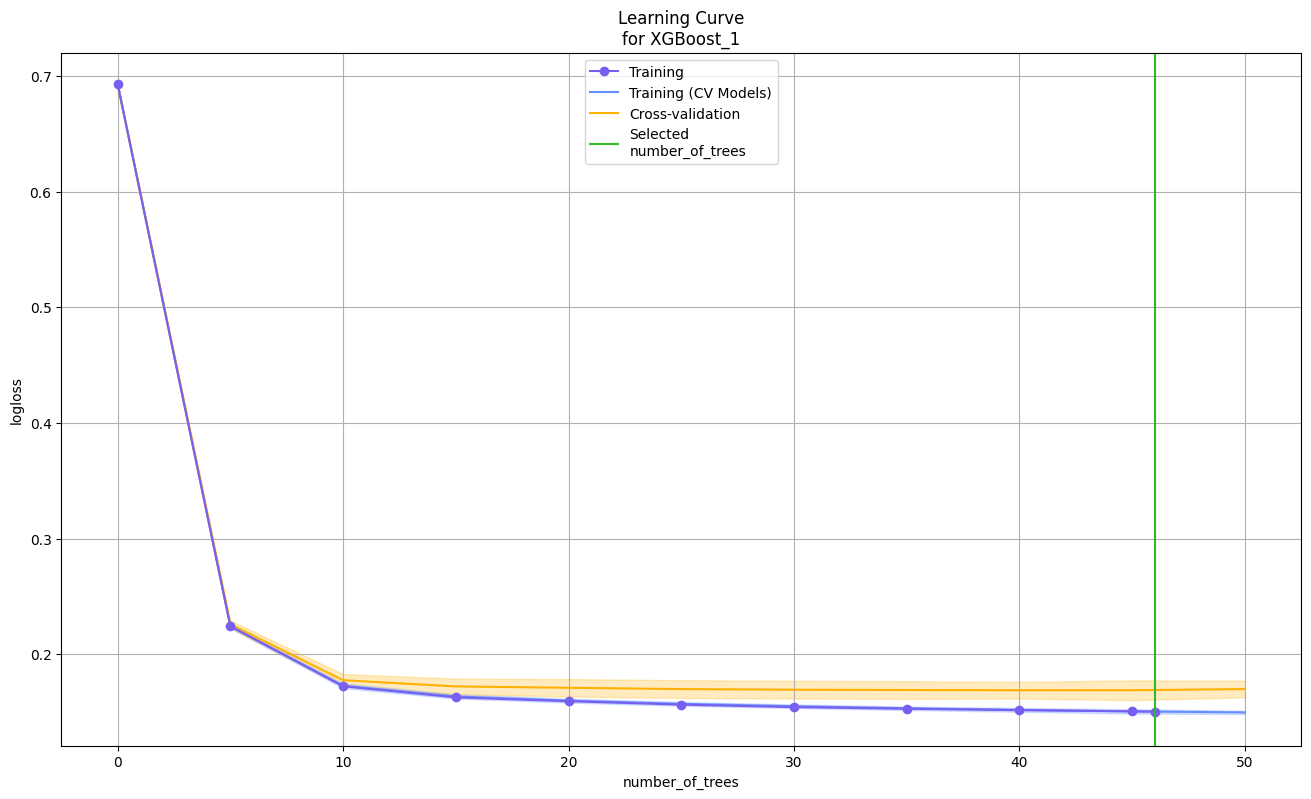

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

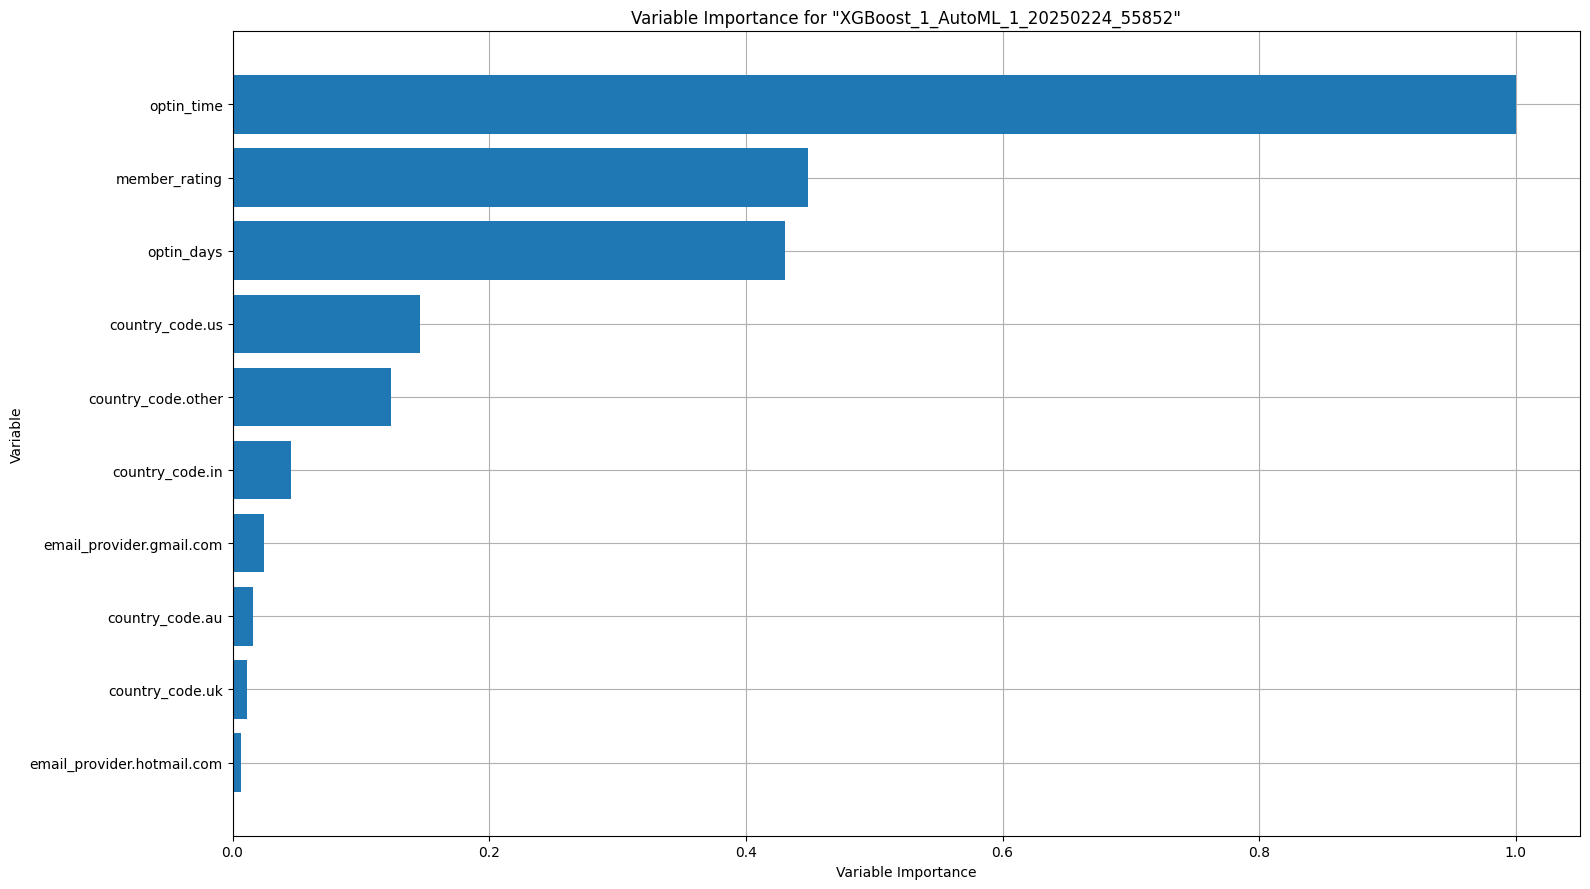

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

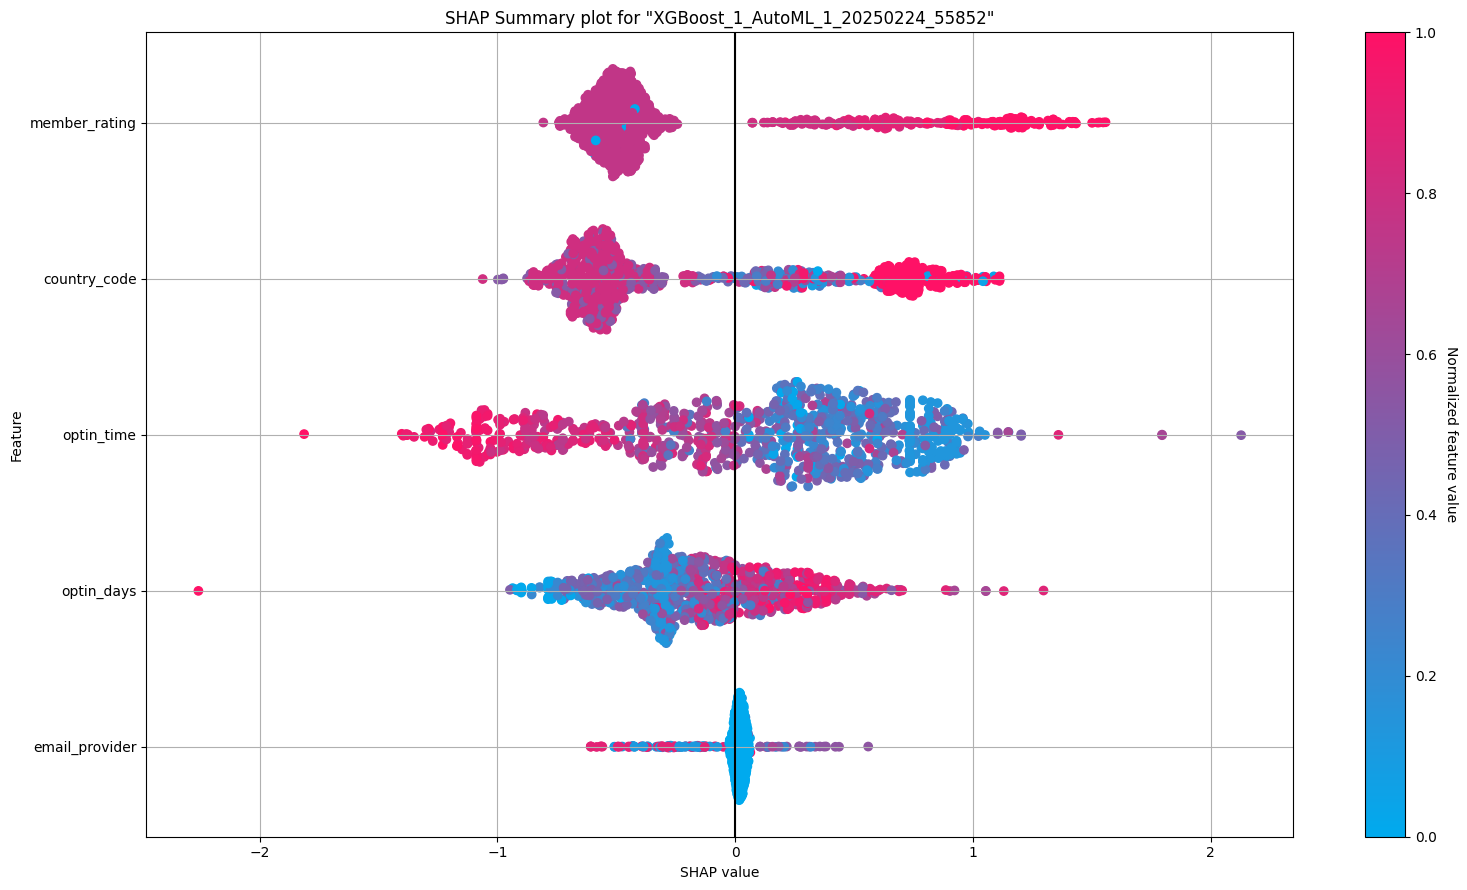

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

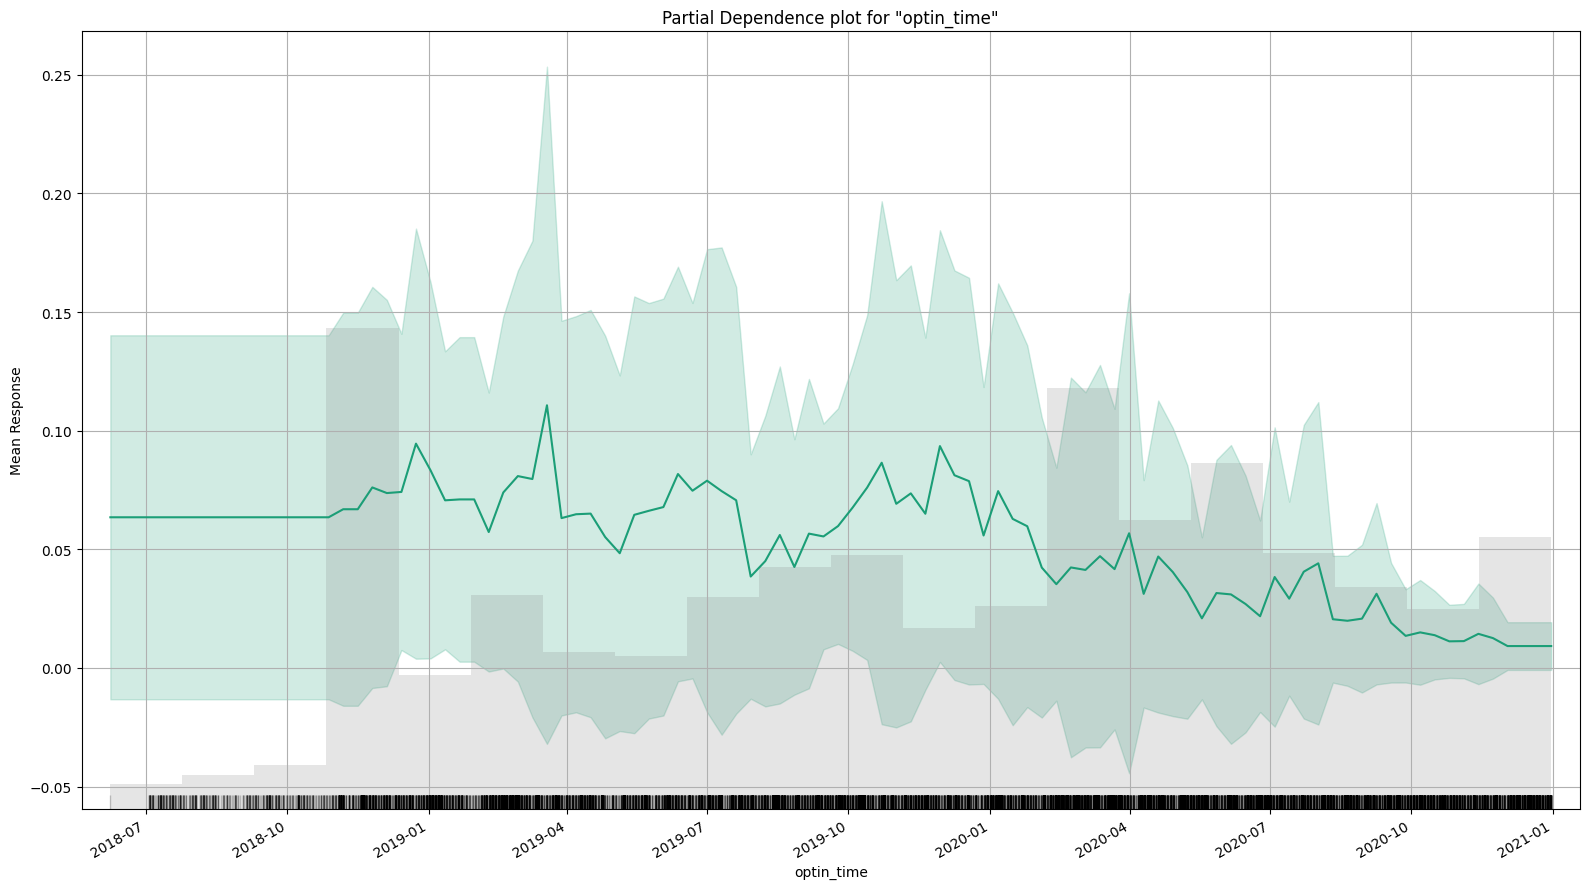

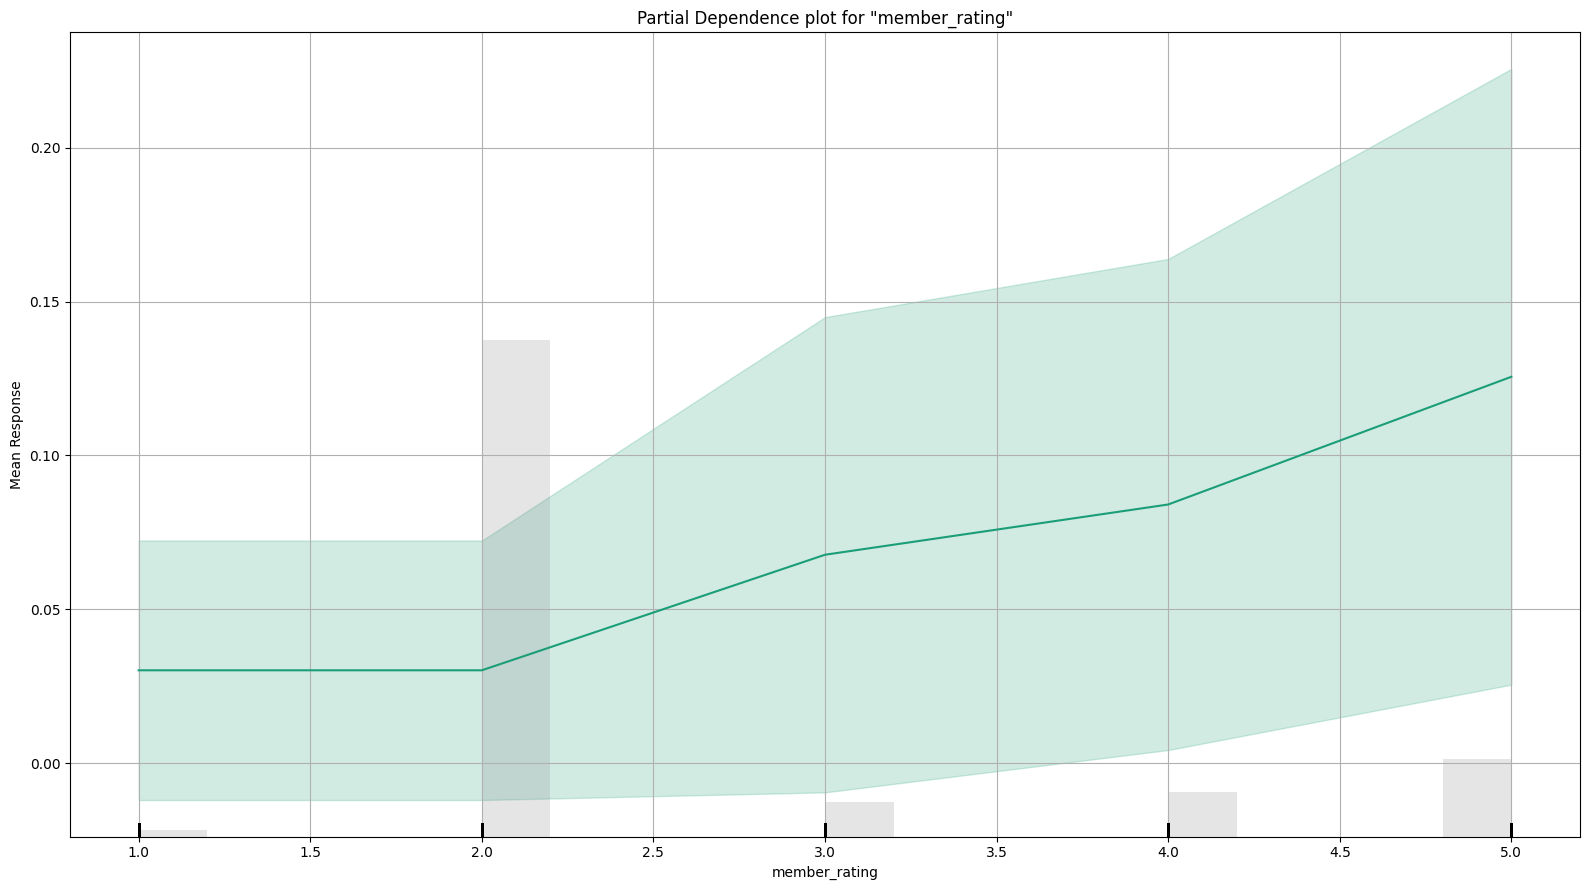

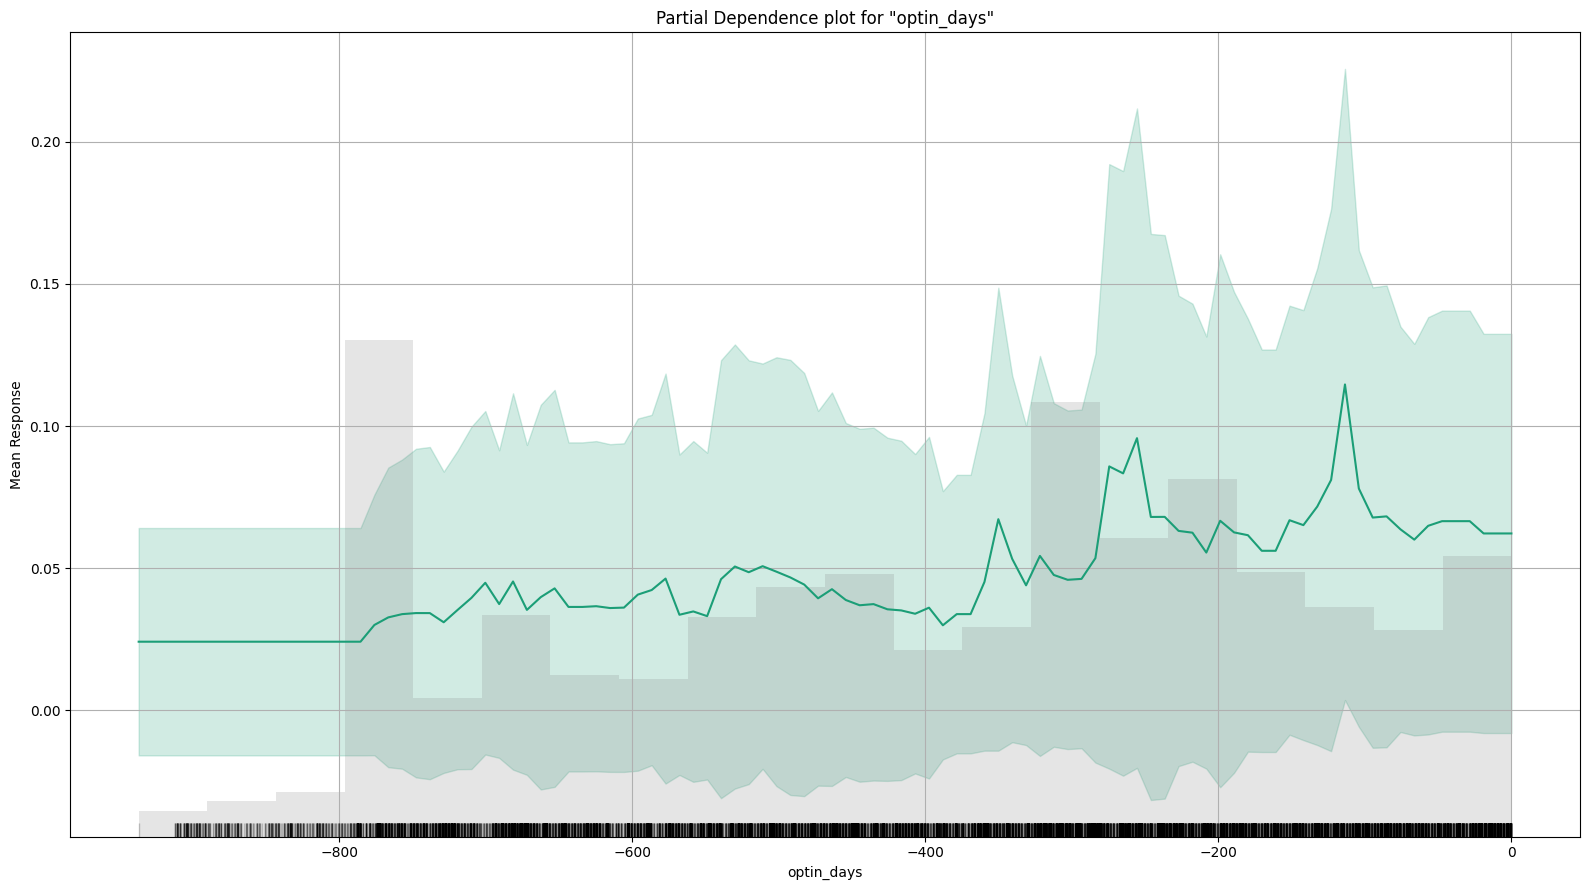

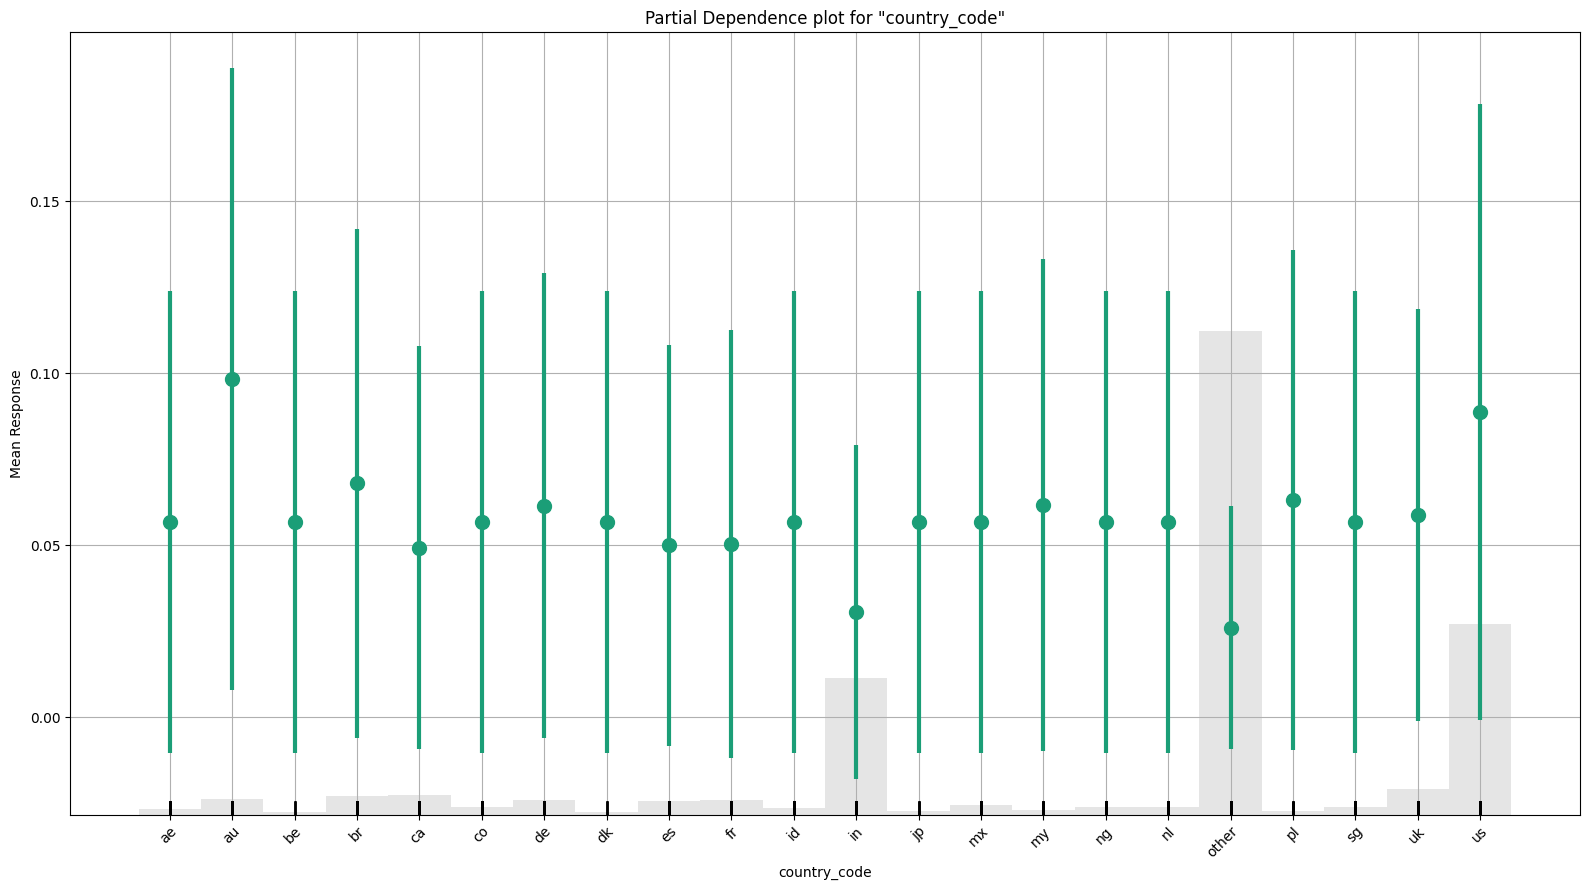

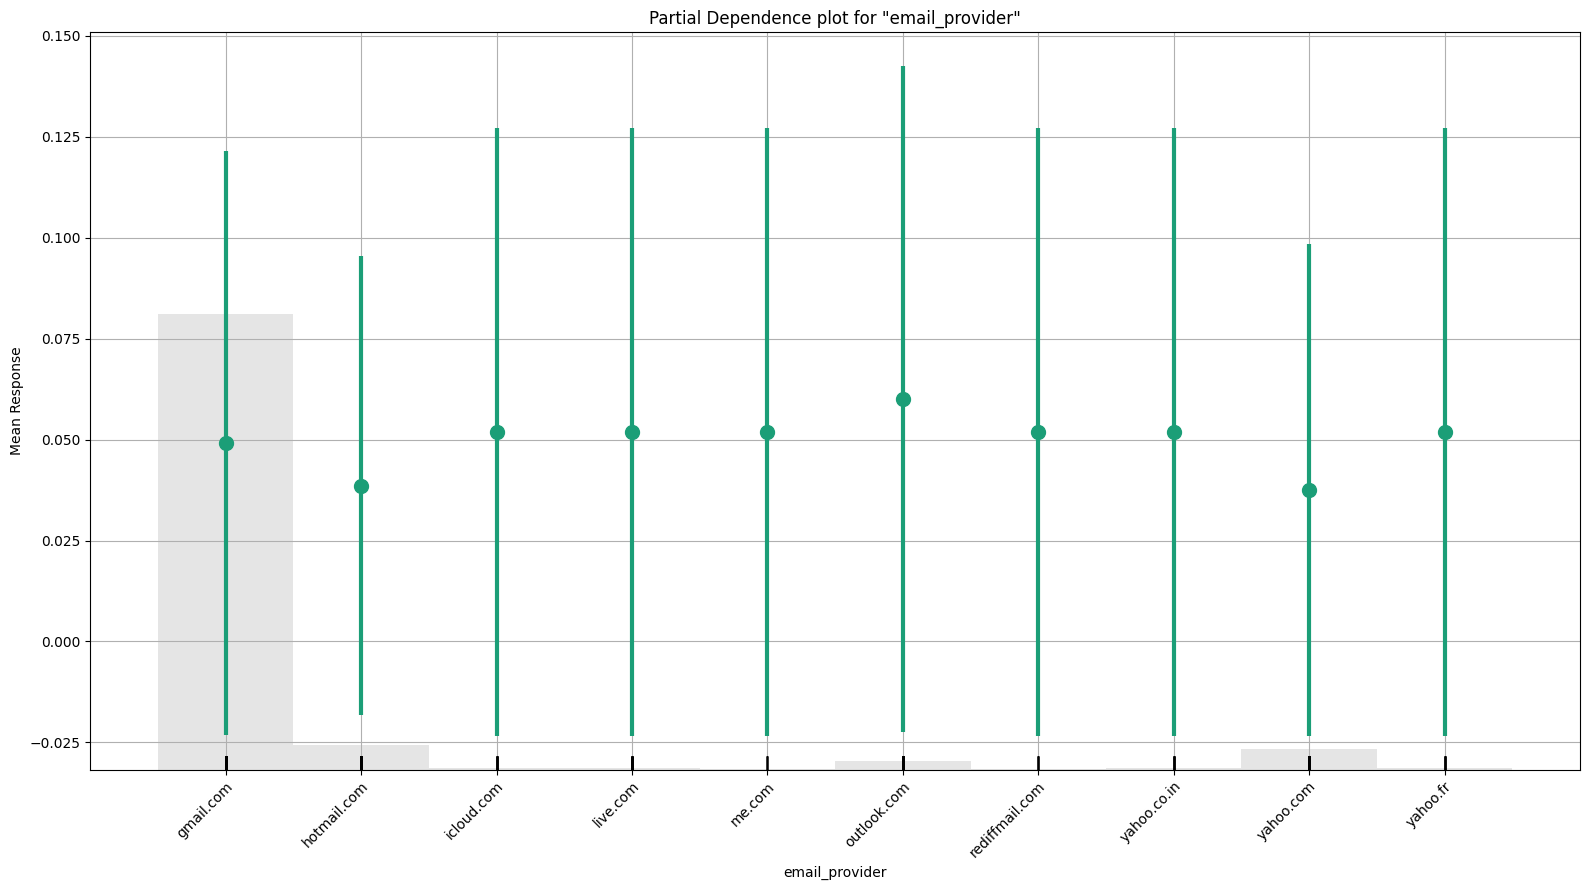

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_1_AutoML_1_20250224_55852

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15629950745238197
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      18084  873   0.0461   (873.0/18957.0)
1      587    375   0.6102   (587.0/962.0)
Total  18671  1248  0.0733   (1460.0/19919.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

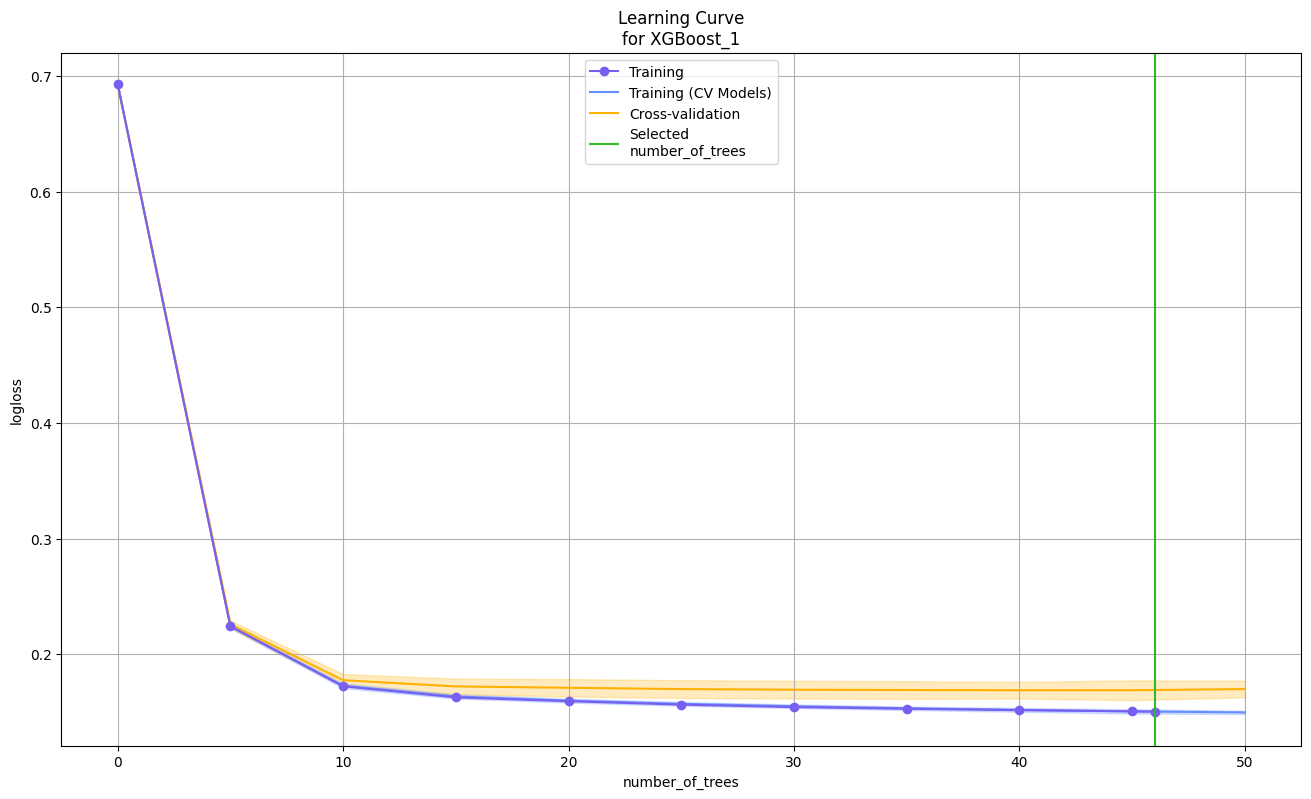

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

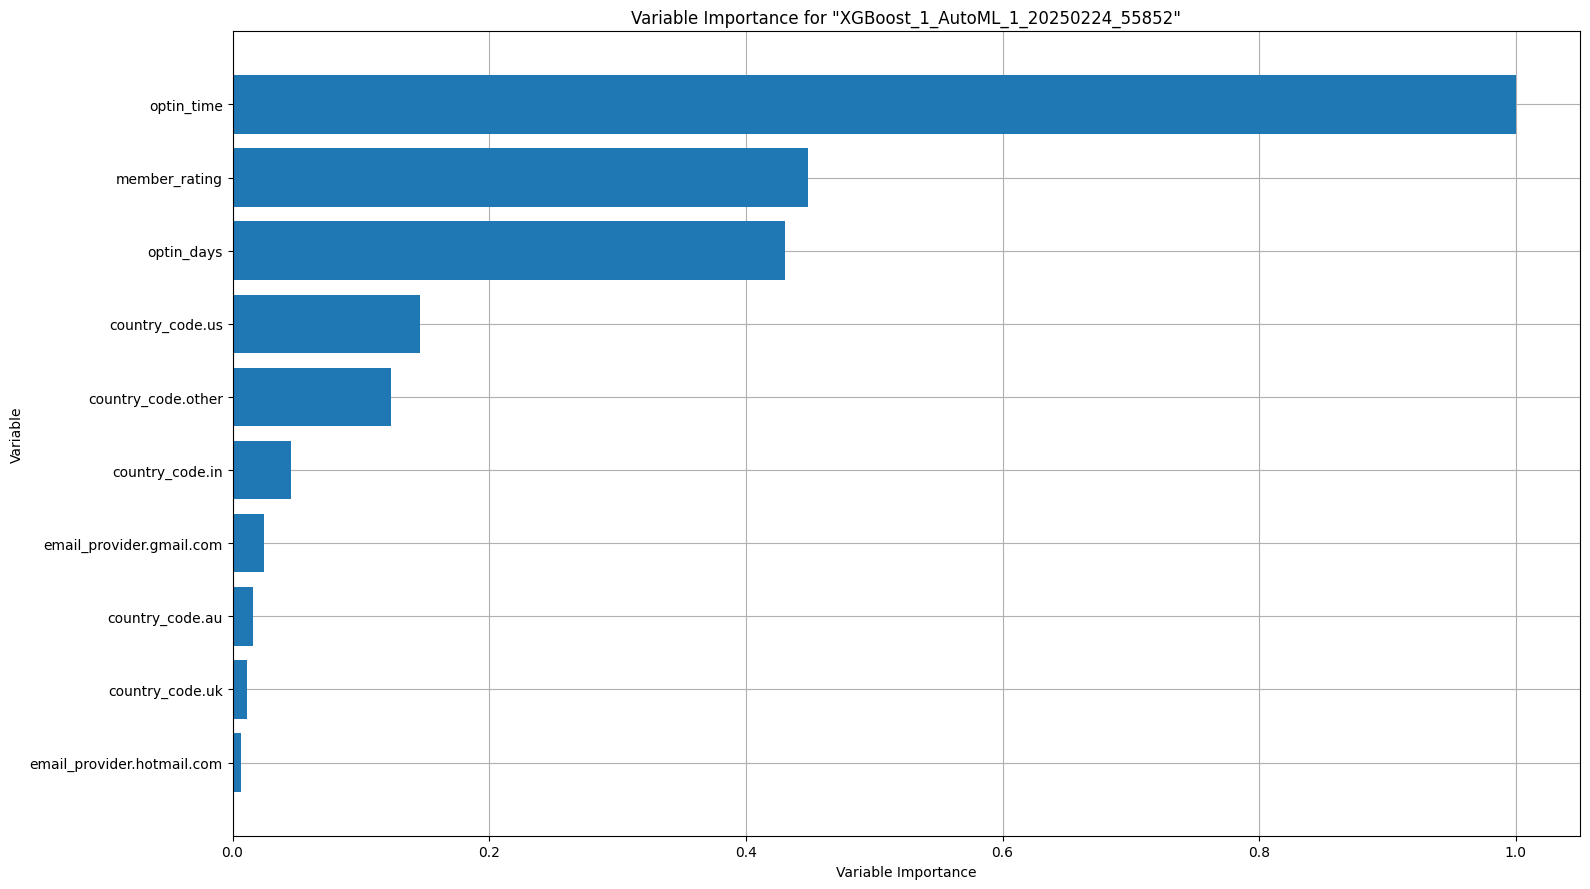

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

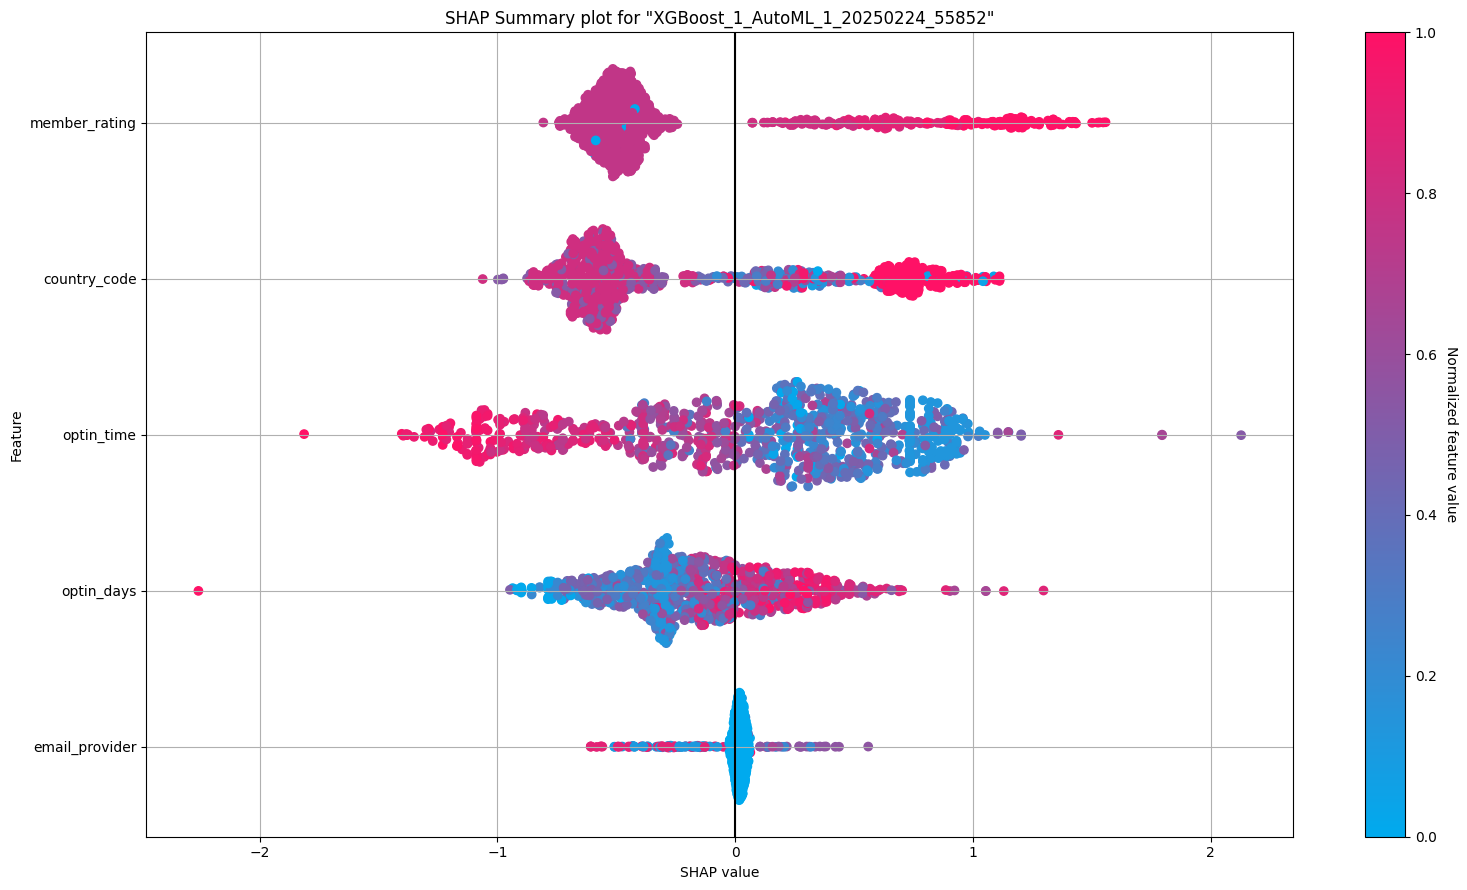

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

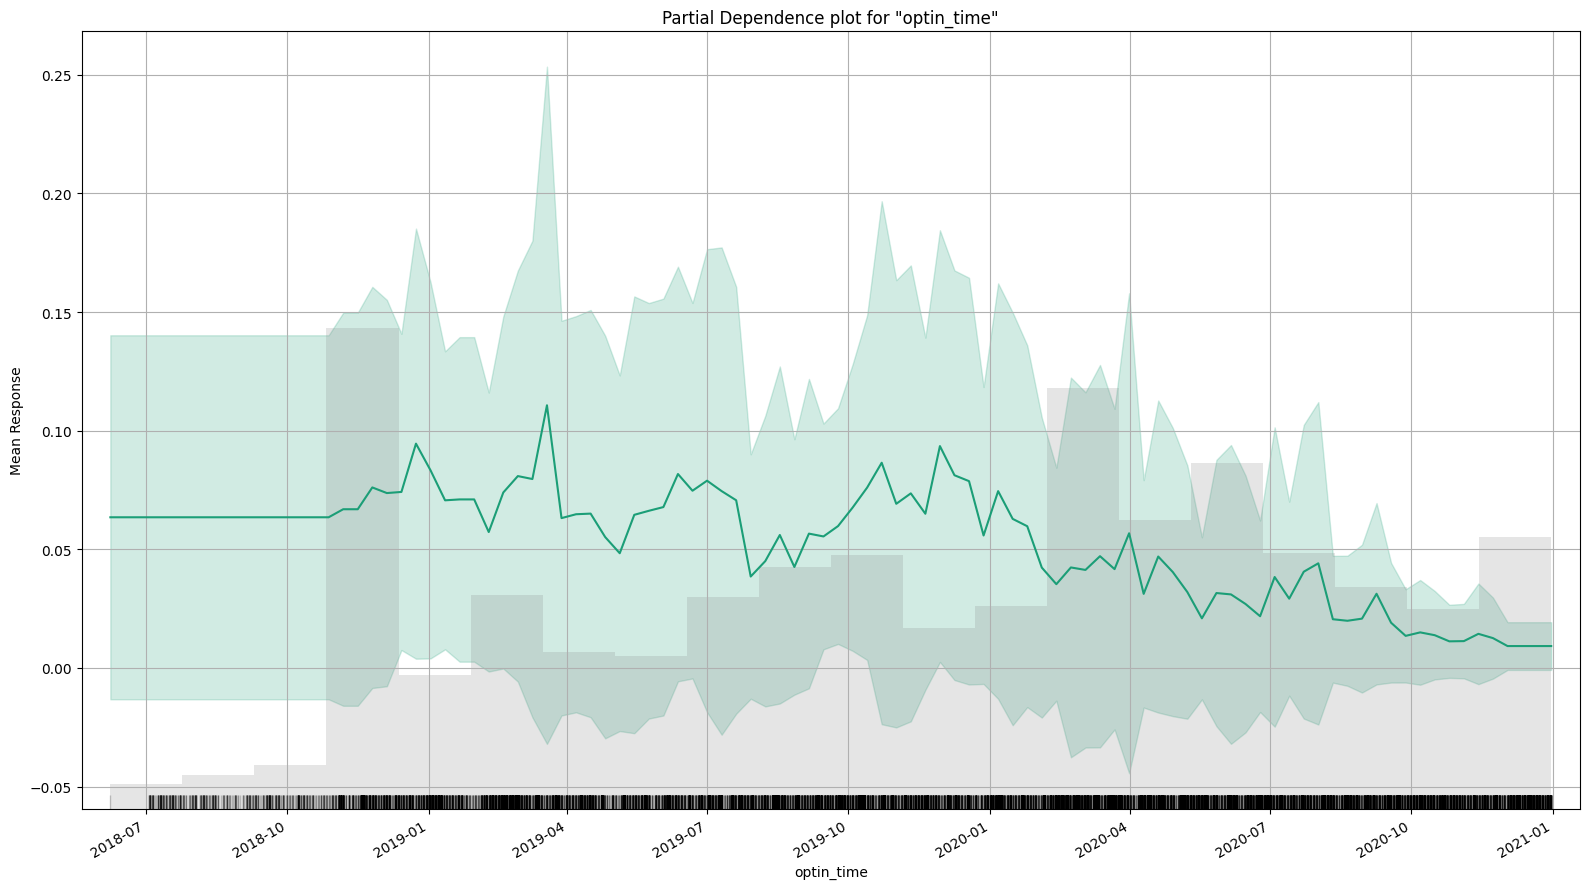

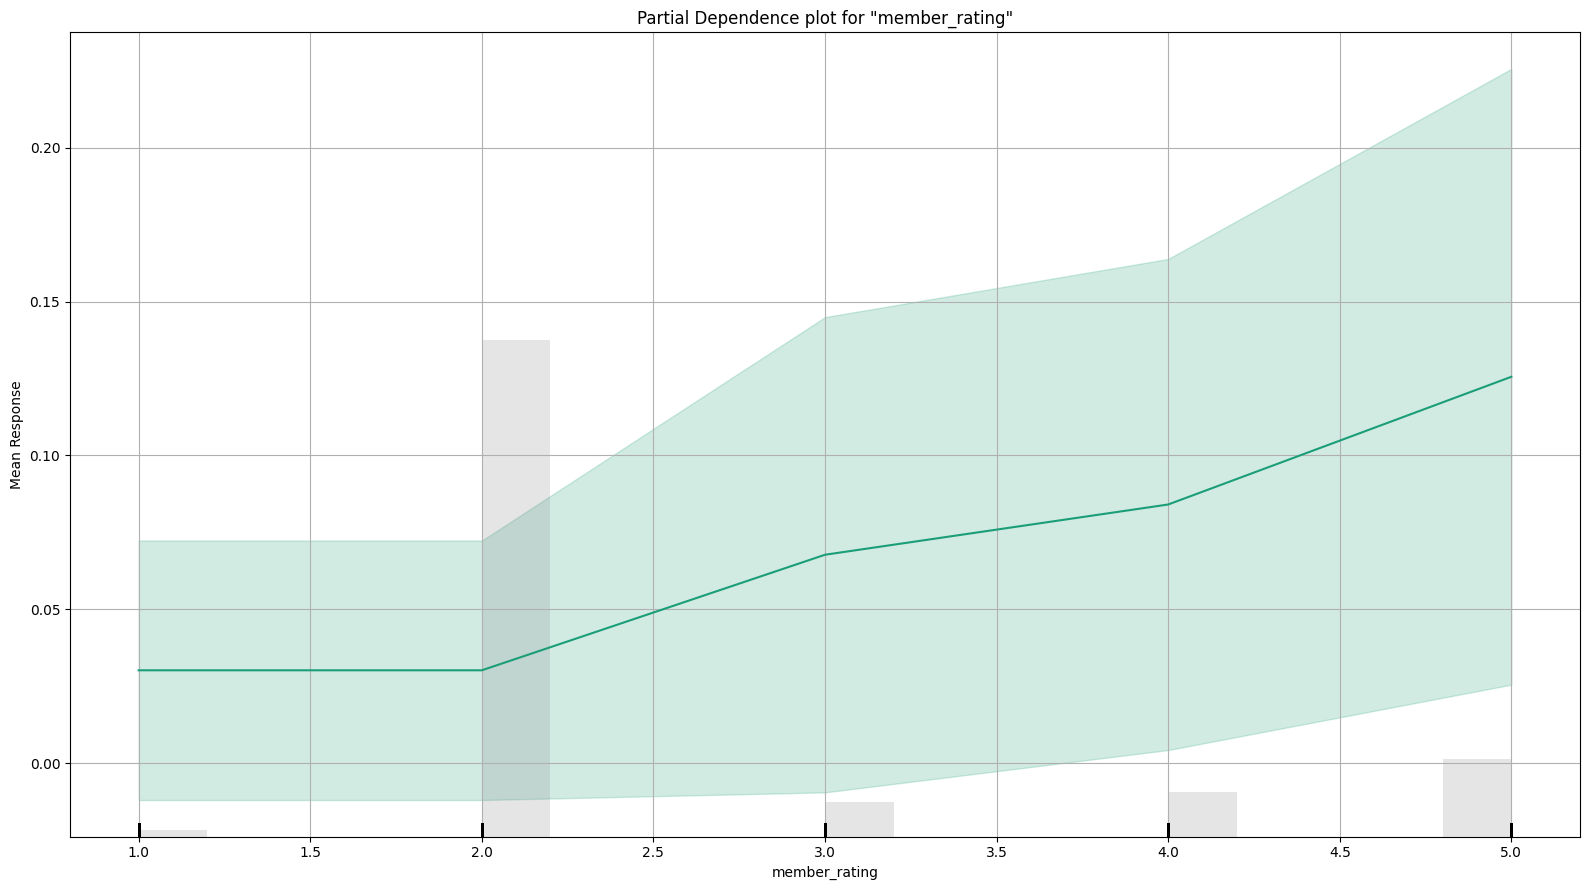

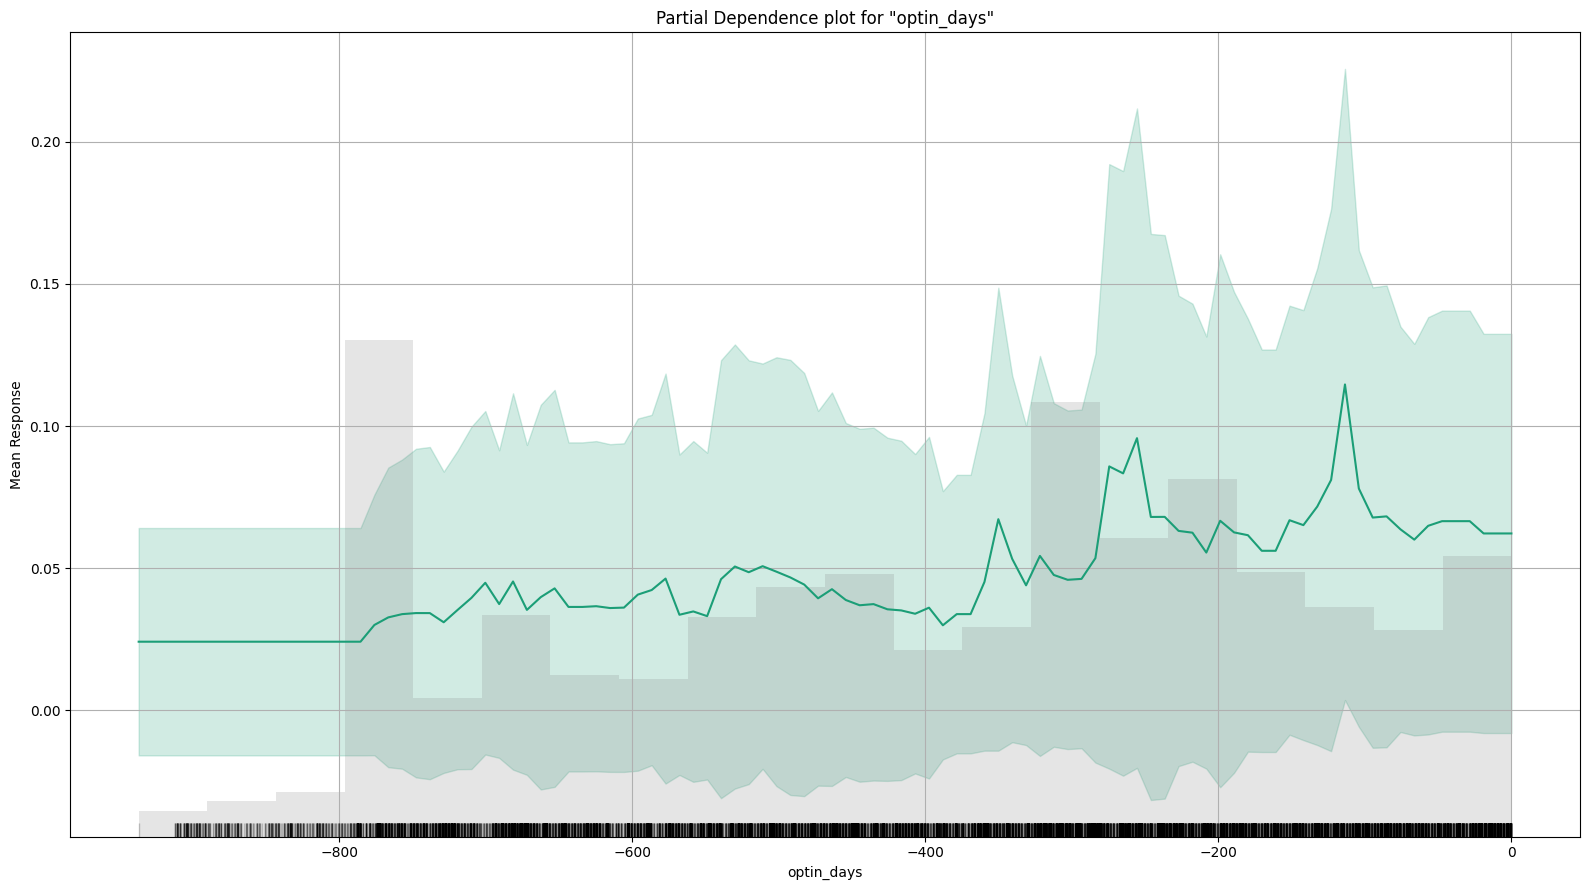

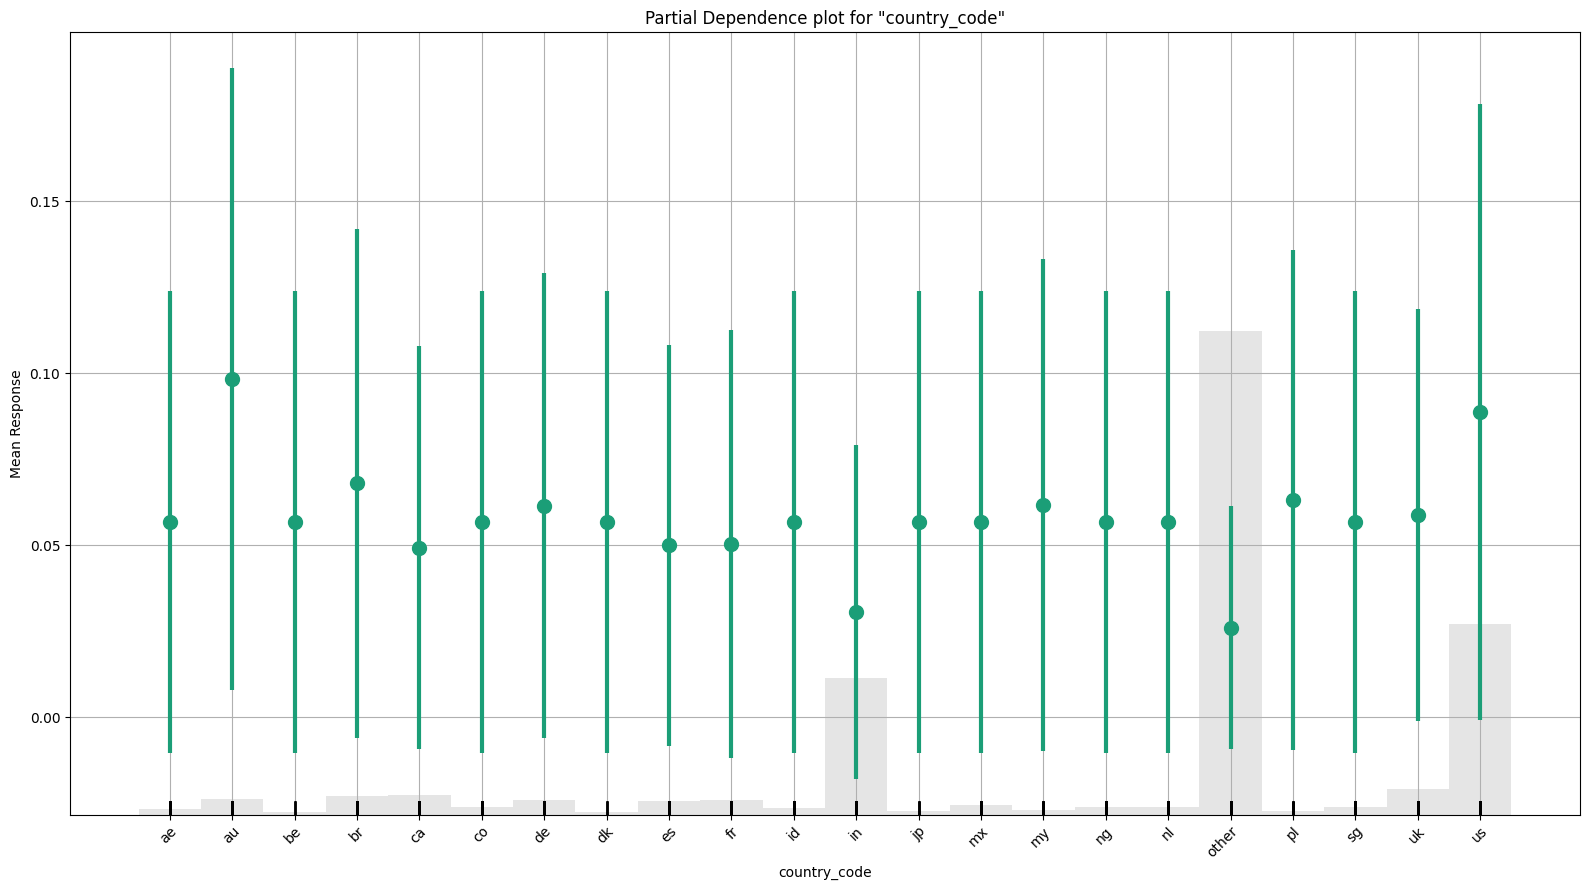

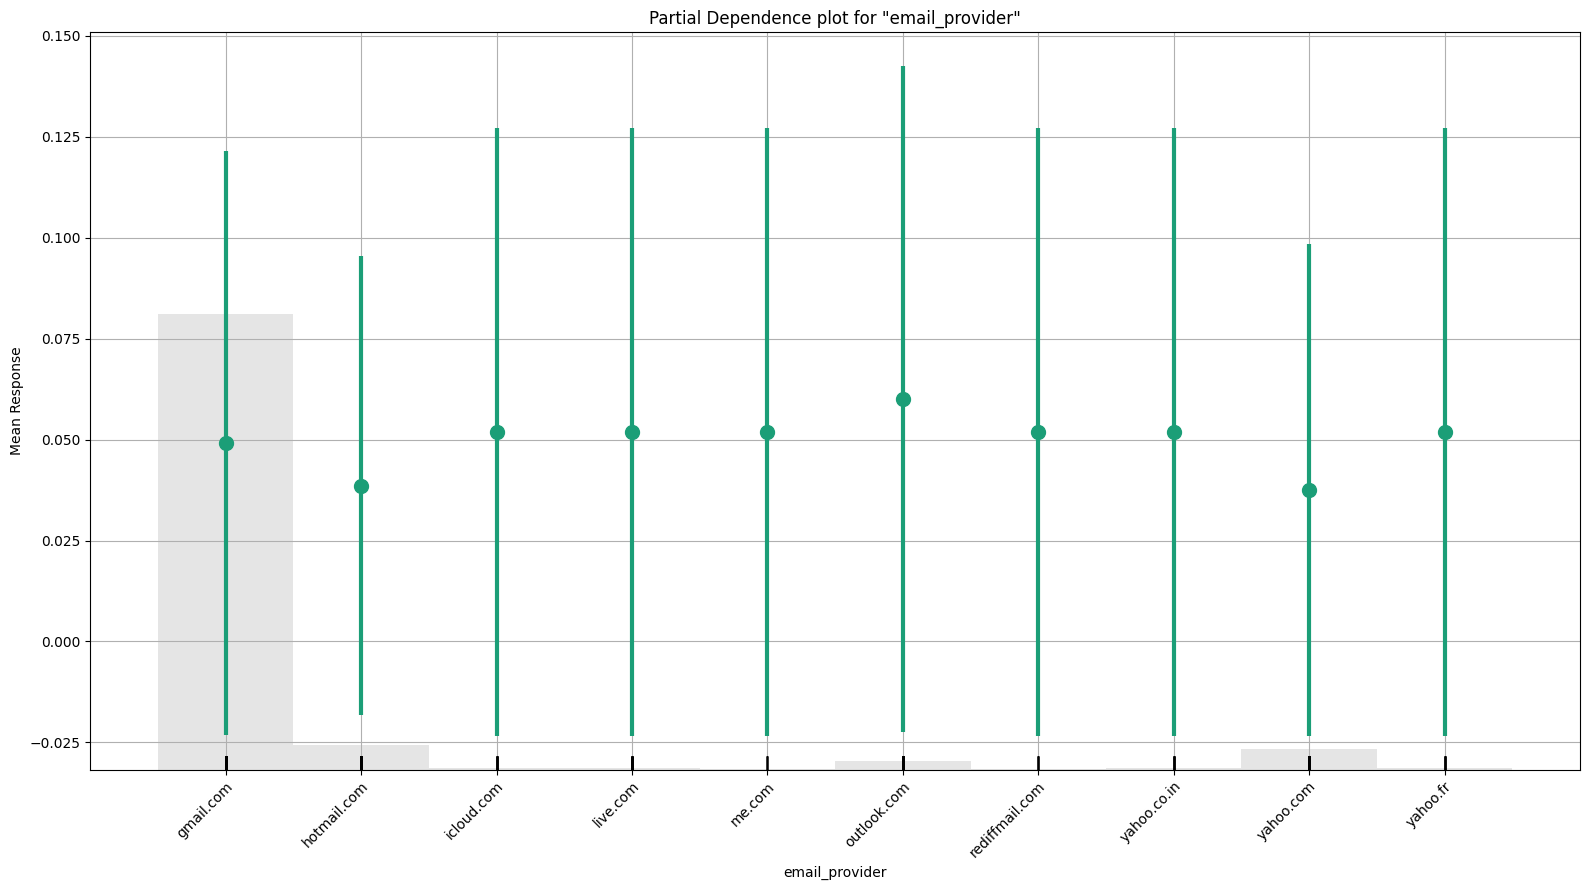

In [ ]:
best_model_h2o = h2o.load_model("/content/drive/MyDrive/ML/model/best_model_h2o")
best_model_h2o.explain(hf)

# ÈñãÂßãÈ†êÊ∏¨

## ÈÄ≤Ë°åÈ†êÊ∏¨

In [ ]:
predictions_df = best_model_h2o.predict(hf).as_data_frame()

xgboost prediction progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# Âª∫Á´ãË≥áÊñôÂ∫´ÈÄ£Á∑ö
sql_engine = sql.create_engine('sqlite:////content/drive/MyDrive/ML/database/leads_transactions.db')
# Â∞áDataFrameÂ≠òÂÖ•leads_ltb_h2oÁöÑË≥áÊñôË°®
result = pd.concat([leads_df, predictions_df], axis=1).to_sql(
    'leads_ltb_h2o',
    con=conn, if_exists='replace', index=False
)
print(f'ÊàêÂäüÂØ´ÂÖ• {result} Á≠ÜË≥áÊñô„ÄÇ')

ÊàêÂäüÂØ´ÂÖ• 19919 Á≠ÜË≥áÊñô„ÄÇ


## È†êÊ∏¨ÁµêÊûú

- predict: Ê®°ÂûãÈ†êÊ∏¨Ë©≤ÊΩõÂú®Áî®Êà∂ÊòØÂê¶ÊúÉË≥ºË≤∑
  - `0`Ë°®Á§∫È†êÊ∏¨ÈÄôÂÄãÁî®Êà∂**„Äå‰∏çÊúÉË≥ºË≤∑„Äç**Áî¢ÂìÅ„ÄÇ
  - `1`Ë°®Á§∫È†êÊ∏¨ÈÄôÂÄãÁî®Êà∂**„ÄåÊúÉË≥ºË≤∑„Äç**Áî¢ÂìÅ„ÄÇ
- p0: Áî®Êà∂„Äå‰∏çÊúÉË≥ºË≤∑„ÄçÁöÑÊ©üÁéá
- p1: Áî®Êà∂„ÄåÊúÉË≥ºË≤∑„ÄçÁöÑÊ©üÁéá

In [ ]:
# ËÆÄÂèñË≥áÊñôË°®Ôºà‰æãÂ¶ÇÔºöleads_ltb_h2oÔºâ
df = pd.read_sql('SELECT * FROM leads_ltb_h2o', con=sql_engine)

# Ê™¢Ë¶ñÂâçÂπæÁ≠ÜË≥áÊñô
df.head()

mailchimp_id       user_full_name                     user_email  \
0             3    Garrick Langworth    garrick.langworth@gmail.com   
1             4      Cordell Dickens      cordell.dickens@gmail.com   
2             8            Inga Dach            inga.dach@gmail.com   
3            10  Ferdinand Bergstrom  ferdinand.bergstrom@gmail.com   
4            11       Justen Simonis       justen.simonis@gmail.com   

   member_rating                  optin_time country_code  made_purchase  \
0              2  2019-05-22 00:00:00.000000           in              1   
1              4  2018-11-19 00:00:00.000000        other              1   
2              2  2018-11-19 00:00:00.000000        other              1   
3              2  2020-03-20 00:00:00.000000           co              1   
4              2  2020-04-14 00:00:00.000000        other              0   

   optin_days email_provider  predict        p0        p1  
0        -589      gmail.com        0  0.961327  0.038673  
1        -773      gmail.com        0  0.927102  0.072898  
2        -773      gmail.com        0  0.980488  0.019512  
3        -286      gmail.com        0  0.962787  0.037213  
4        -261      gmail.com        0  0.986231  0.013769

# Ë°åÈä∑Ë∑üÈÄ≤Á≠ñÁï•

Ë©ïÂàÜÁ≠âÁ¥ö|p1ÁØÑÂúç|Ë°åÈä∑Á≠ñÁï•ÊñπÂêë|Ë∑üÈÄ≤Á≠ñÁï•ÊñπÊ°à|È†êÁÆóÂàÜÈÖç
-|-|-|-|-
Hotüî•|‚â•0.8|Á´ãÂç≥ËΩâÊèõ|-Êèê‰æõÈôêÊôÇÁç®‰∫´ÂÑ™ÊÉ†ÊàñÂ∞àÂ±¨ÊäòÊâ£ÔºåÂ¶ÇÂ∞àÂ±¨ÂÑ™ÊÉ†VIPÈôêÊôÇÊäòÊâ£Á¢º(72Â∞èÊôÇÊúâÊïà)„ÄÇ<br>-Êèê‰æõ‰∏ÄÂ∞ç‰∏ÄÁ∑ö‰∏äÂÖçË≤ªË´ÆË©¢ÊàñÈ´îÈ©óË©¶Áî®„ÄÇ<br>-ÂÄãÊÄßÂåñÈõªÂ≠êÈÉµ‰ª∂„ÄÅLINEÊé®Êí≠ÊàñÂ∞à‰∫∫ÈõªË©±ËÅØÁπ´„ÄÇ|50%
Warmüå§|0.6-0.8|ÂÉπÂÄºÂª∫Á´ã|-Êèê‰æõÊïôËÇ≤ÊÄßÂÖßÂÆπÔºåÂ¶Ç‰ΩøÁî®ÊîªÁï•„ÄÅÊàêÂäüÊ°à‰æãÂàÜ‰∫´ÂΩ±ÁâáÔºå‰æÜÂº∑ÂåñÁî¢ÂìÅ‰ø°‰ªª„ÄÇ<br>-ÈÄèÈÅéËºïÈ¨Ü‰∫íÂãïÔºåÂ¶ÇÊäΩÁçé„ÄÅÂïèÁ≠îÊ¥ªÂãïÔºåÂ¢ûÂä†ÂèÉËàáÊÑüÂèäËààË∂£„ÄÇ<br>-ÂØÑÈÄÅÁî¢ÂìÅ‰ΩøÁî®È´îÈ©óË™øÊü•ÊàñË©¶Áî®Â∞èÂåÖË£ùÔºåÈºìÂãµÊèêÂçáËààË∂£„ÄÇ|30%
Cold‚ùÑÔ∏è|0.4-0.6|ËààË∂£ÂñöÈÜí|-Êèê‰æõÂü∫Á§éÁü•Ë≠òÂûãÂÖßÂÆπÔºåÂ¶ÇÊñ∞ÊâãÊïôÂ≠∏„ÄÅÁî¢ÂìÅQ&AÁ≠âÔºåÂª∫Á´ãË™çÁü•„ÄÇ<br>-‰ΩøÁî®Ë∂£Âë≥ÊÄßÈÅäÊà≤ÊàñËºïÈáè‰∫íÂãïÂºèÂ∞èÊ∏¨È©óÔºåÂ¢ûÂä†ÊΩõÂú®ËààË∂£„ÄÇ<br>-ÈÄèÈÅéÂÜçË°åÈä∑Âª£ÂëäÂèçË¶ÜÊõùÂÖâÔºå‰ª•Âä†Ê∑±Âç∞Ë±°„ÄÇ|15%
Non-Targetüö´|<0.4|‰ΩéÊàêÊú¨Ë∑üÈÄ≤|-Ê∏õÂ∞ë‰∏ªÂãïË°åÈä∑Ë≥áÊ∫êÔºåÂÉÖ‰ª•Ëá™ÂãïÂåñÈõªÂ≠êÂ†±ÂÆöÊúüËÅØÁµ°„ÄÇ<br>-Êèê‰æõÂª£Ê≥õ‰∏îÊôÆÈÅçÁöÑÂÖßÂÆπÔºåÂ¶ÇÈÉ®ËêΩÊ†ºÊñáÁ´†„ÄÅÂ∏∏Ë¶ãÂïèÈ°åÈõÜÁ≠âÔºå‰ΩéÊàêÊú¨Á∂≠ÊåÅÂìÅÁâåÊé•Ëß∏Èªû„ÄÇ|5%

In [ ]:
conditions = [
    df['p1'] >= 0.8,
    df['p1'].between(0.6, 0.8),
    df['p1'].between(0.4, 0.6),
    df['p1'] < 0.4
]
choices = ['Hot Lead', 'Warm Lead', 'Cold Lead', 'Non-Target']
df['lead_grade'] = np.select(conditions, choices)
df

mailchimp_id          user_full_name                       user_email  \
0                 3       Garrick Langworth      garrick.langworth@gmail.com   
1                 4         Cordell Dickens        cordell.dickens@gmail.com   
2                 8               Inga Dach              inga.dach@gmail.com   
3                10     Ferdinand Bergstrom    ferdinand.bergstrom@gmail.com   
4                11          Justen Simonis         justen.simonis@gmail.com   
...             ...                     ...                              ...   
19914         33405   Ms. Felicity Moore MD   ms.felicity.moore.md@gmail.com   
19915         33406            Shirley Rowe           shirley.rowe@gmail.com   
19916         33407  Jarrett Walker-Carroll  jarrett.walkercarroll@gmail.com   
19917         33408            Tanja Herzog           tanja.herzog@gmail.com   
19918         33409          Farrell Murphy         farrell.murphy@gmail.com   

       member_rating                  optin_time country_code  made_purchase  \
0                  2  2019-05-22 00:00:00.000000           in              1   
1                  4  2018-11-19 00:00:00.000000        other              1   
2                  2  2018-11-19 00:00:00.000000        other              1   
3                  2  2020-03-20 00:00:00.000000           co              1   
4                  2  2020-04-14 00:00:00.000000        other              0   
...              ...                         ...          ...            ...   
19914              2  2018-11-18 00:00:00.000000        other              0   
19915              1  2019-03-12 00:00:00.000000           br              0   
19916              2  2019-09-09 00:00:00.000000           in              0   
19917              2  2019-10-24 00:00:00.000000        other              0   
19918              2  2020-06-19 00:00:00.000000           ae              0   

       optin_days email_provider  predict        p0        p1  lead_grade  
0            -589      gmail.com        0  0.961327  0.038673  Non-Target  
1            -773      gmail.com        0  0.927102  0.072898  Non-Target  
2            -773      gmail.com        0  0.980488  0.019512  Non-Target  
3            -286      gmail.com        0  0.962787  0.037213  Non-Target  
4            -261      gmail.com        0  0.986231  0.013769  Non-Target  
...           ...            ...      ...       ...       ...         ...  
19914        -774      gmail.com        0  0.988238  0.011762  Non-Target  
19915        -660      gmail.com        0  0.950818  0.049182  Non-Target  
19916        -479      gmail.com        0  0.971380  0.028620  Non-Target  
19917        -434      gmail.com        0  0.987937  0.012063  Non-Target  
19918        -195      gmail.com        0  0.990675  0.009325  Non-Target  

[19919 rows x 13 columns]

# ÈóúÈñâÈÄ£Êé•

In [ ]:
conn.close()
h2o.cluster().shutdown(prompt=False)

H2O session _sid_bd35 closed.
